<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_36/blob/main/Reto_Aguas_subterraneas_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Ciencia y Analítica de Datos**
###Tecnológico de Monterrey
###Prof Titular: **Dra. María de la Paz Rico**
###Tutor: **Roberto Antonio Guevara González**

####**Equipo 36**
####*Marcos Chávez - A01688507*
####*Bernanrdo Mijangos - A01793654*

https://github.com/PosgradoMNA/actividades-del-projecto-equipo_36/blob/main/Reto_Aguas_subterraneas_Entrega2.ipynb

####*Fecha de entrega 18/11/2022*

###**Base de datos Aguas Subterraneas**

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
import pandas as pd
import scipy as scp
import numpy as np
import sklearn.preprocessing as preprocessing

from sklearn import linear_model as lm
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, learning_curve, validation_curve

import requests, zipfile
from io import BytesIO

from tqdm import tqdm
from shapely.geometry import Point
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

from geopy.geocoders import Nominatim
import geopy.distance

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

from packaging import version

In [2]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

In [3]:
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [4]:
binarias = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
            'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
            'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
            'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
            'CUMPLE_CON_FE']

In [5]:
df[binarias].describe()

,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932


El preprocesamiento definido para estas variables fue el cambio de los valores **ND** por **SI**, en virtud de que los **ND** no se tomaron en cuenta en la construcción de la variable **SEMAFORO**. Al imputarlos como **SI** no alteran la congruencia de dicha varibable. 

In [6]:
# Cambian los valores 'ND' por 'SI'

df.CUMPLE_CON_ALC = df.CUMPLE_CON_ALC.replace("ND","SI")
df.CUMPLE_CON_COND = df.CUMPLE_CON_COND.replace("ND","SI")
df.CUMPLE_CON_SDT_ra = df.CUMPLE_CON_SDT_ra.replace("ND","SI")
df.CUMPLE_CON_SDT_salin = df.CUMPLE_CON_SDT_salin.replace("ND","SI")
df.CUMPLE_CON_DUR = df.CUMPLE_CON_DUR.replace("ND","SI")
df.CUMPLE_CON_NO3 = df.CUMPLE_CON_NO3.replace("ND","SI")


Posteriomente se convierten a 0 y 1 las variables de cumplimiento.

In [10]:
le = preprocessing.LabelEncoder()

X = pd.DataFrame()
for i in df[binarias].columns:
  le.fit(df[binarias][i])
  LabelEncoder()
  X[i]=le.transform(df[binarias][i])

###**Selecciona tus variables independientes X y dependiente Y (semáforo)**

In [11]:
# X Variables de cumpliemiento codificadas con 0 y 1
Y = df['SEMAFORO'] #Variable de semáforo

###**Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]**

In [12]:
#Antes de preproceso
Y.value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [13]:
le = preprocessing.LabelEncoder()

In [14]:
le.fit(Y)
Y=pd.DataFrame(le.transform(Y))

In [15]:
Y.value_counts()

2    434
1    387
0    247
dtype: int64

In [16]:
Y[0] = Y[0].replace([2,1,0],[1,3,2])

In [17]:
Y.value_counts(sort=False)

1    434
2    247
3    387
dtype: int64

###**Realiza un análisis general de las features importances a traves de decision trees o random forest**

Se llevo a cabo el análisis de feature importances con **Random Forest** y se encontró que 5 de las variables (una tercera parte) concentran el 73 por ciento de este indicador (casi tres cuartas partes) y 7 de ellas represntan el 87 por ciento.
<br>
Vale la pena destacar que la variable **CUMPLE_CON_FLUO** por si sóla concentra casi una cuarta parte de la importancia, bajo este algoritmo.  

In [18]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X, np.ravel(Y))
for score, name in zip(rnd_clf.feature_importances_, X.columns):
    print(round(score, 2), name)

0.03 CUMPLE_CON_ALC
0.04 CUMPLE_CON_COND
0.01 CUMPLE_CON_SDT_ra
0.01 CUMPLE_CON_SDT_salin
0.23 CUMPLE_CON_FLUO
0.17 CUMPLE_CON_DUR
0.09 CUMPLE_CON_CF
0.12 CUMPLE_CON_NO3
0.12 CUMPLE_CON_AS
0.0 CUMPLE_CON_CD
0.03 CUMPLE_CON_CR
0.0 CUMPLE_CON_HG
0.02 CUMPLE_CON_PB
0.07 CUMPLE_CON_MN
0.07 CUMPLE_CON_FE


###**Selecciona las variables de mayor importancia**

Se decidió eligier las 5 variables con mayor impotancia para llevar a cabo el análisis.

In [19]:
X_var = X[['CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CF']].copy()

In [20]:
X_var.head()

,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CF
0,1,1,1,1,1
1,1,1,1,1,1
2,0,1,1,0,1
3,1,1,1,1,1
4,1,1,0,1,1


###**Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)**

La elección de la cantidad de elementos con los cuales entrenar el modelo y probarlo fueron los siguientes:

*   Conjunto de entrenamiento 80%
*   Conjunto de prueba 20%

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_var, Y, test_size = 0.2, random_state = 35)

###**Explora que clasificador es el más optimo, ejemplo:**
###-*Decision trees*
###-*Random Forest*

Se lleva a cabo a las predicción con ambos modelos con los datos de entrenamiento. Se incorpora el parámetro ***class_weight = balance*** para considerar el desbalance existente entre las clases.


In [22]:
# Decision Tree

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight = 'balanced')
tree_clf.fit(X_train, y_train)

y_pred_dt = tree_clf.predict(X_test)

In [24]:
print(round(accuracy_score(y_test, y_pred_dt)*100, 1),'%')

77.6 %


In [25]:
# Random Forest

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, class_weight = 'balanced')
rnd_clf.fit(X_train, np.ravel(y_train))
y_pred_rf = rnd_clf.predict(X_test)


In [26]:
print(round(accuracy_score(y_test, y_pred_rf)*100, 1),'%')

88.3 %


Se obtiene una mayor precisión con el modelo **Random Forest**, lo cual resulta lógico por su naturaleza.  

###**Determina el grado de exactitud a través del reporte de clasificación**
###**Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión**

####**Decision Tree**

In [27]:
print(classification_report(y_test, y_pred_dt, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.66      1.00      0.80        82
           2       0.85      0.61      0.71        56
           3       1.00      0.66      0.79        76

    accuracy                           0.78       214
   macro avg       0.84      0.76      0.77       214
weighted avg       0.83      0.78      0.77       214



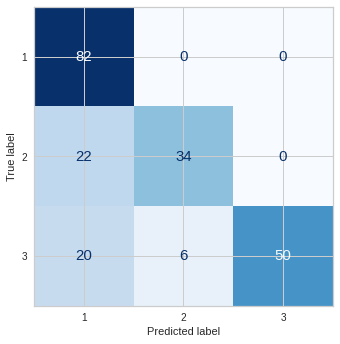

In [28]:
plt.rc('font', size=15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap = 'Blues', colorbar = False)
plt.show()

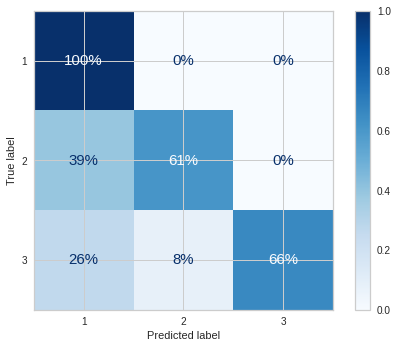

In [29]:
plt.rc('font', size=15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, normalize="true", values_format=".0%", cmap = 'Blues')
plt.show()


####**Random Forest**

In [30]:
print(classification_report(y_test, y_pred_rf, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        82
           2       0.97      0.61      0.75        56
           3       1.00      0.96      0.98        76

    accuracy                           0.88       214
   macro avg       0.92      0.86      0.87       214
weighted avg       0.91      0.88      0.88       214



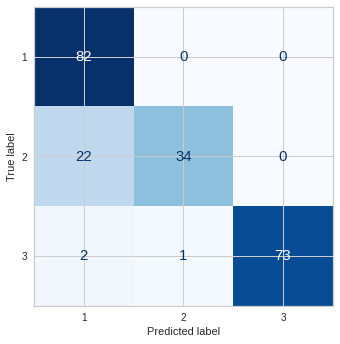

In [31]:
plt.rc('font', size=15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap = 'Blues', colorbar = False)
plt.show()

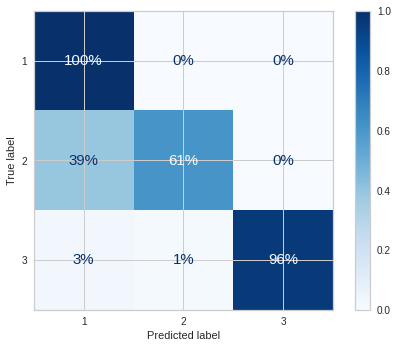

In [32]:
plt.rc('font', size=15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, normalize="true", values_format=".0%", cmap = 'Blues')
plt.show()

###**Conclusiones**

El ***accuracy*** obtenido con el modelo de ***decision tree*** (78%) es menor al observado con ***random forest*** (88%).

Observando las matrices de confusión notamos que el aumento en precisión es por la clasificación adecuada de la clase 3, que pasa 66% a 96% en verdaderos positivos con **random forest**

Con ninguno de los dos modelos se logró mejorar la en pronóstico de la clase 2 (61%), ya que identifica al 39% como clase 1 (con ambos modelos)

Respecto a la clase 1 (mayoritaria) clasifica de forma correcta al 100% de los casos con ambos modelos, sin embargo, clasifica erroneamente elemento de la case 2 y 3 como 1 (principalmente con **decision tree**).

En conclusión **random forest** ofrece un modelo con mejor precisión y mayor equlibrio en sus pronósticos que el de **decision tree**, por lo que consideramos que su uso es más adecuado para este conjunto de datos.

